In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc("font", size=18)

In [4]:
df = pd.read_csv("1.8_phones.csv")
df.head(20)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015
7,64,Android,4277,2013
8,512,iOS,12797,2015
9,64,Android,6256,2015


In [5]:
df["os"].unique()

array(['Android', 'iOS'], dtype=object)

In [9]:

df["os_type"] = df['os'].map({"iOS": 1, "Android": 0})
df.head(20)

,disk,os,price,year,os_type
0,64,Android,7256,2016,0
1,128,Android,7623,2015,0
2,64,Android,1916,2010,0
3,512,iOS,15045,2017,1
4,16,Android,4478,2013,0
5,512,iOS,15842,2018,1
6,128,Android,7191,2015,0
7,64,Android,4277,2013,0
8,512,iOS,12797,2015,1
9,64,Android,6256,2015,0


In [13]:
df[0:80].shape

(80, 5)

## В рамках задачи регрессии нужно предсказать цену телефона

In [10]:
from sklearn.linear_model import LinearRegression

In [14]:
features = ["disk", "year", "os_type"]
df_train = df[:80]
df_test = df[80:]

X_train = df_train[features]
y_train = df_train["price"]

X_test = df_test[features]
y_test = df_test["price"]

In [15]:
reg = LinearRegression().fit(X_train, y_train)

In [16]:
predicts = reg.predict(X_test)

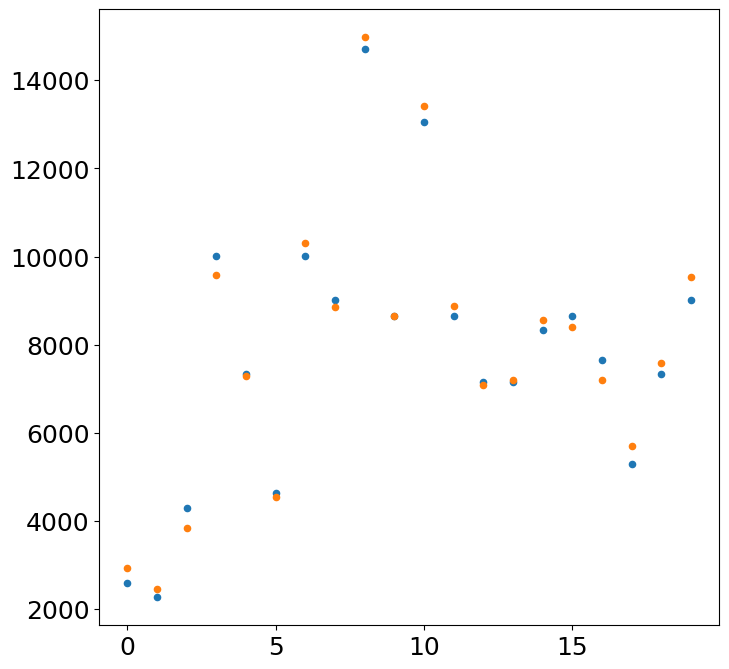

In [17]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()

ax.scatter(range(20), predicts, s=20)
ax.scatter(range(20), y_test, s=20)
plt.show()

In [18]:
summ = 0
for pred, val in zip(predicts, y_test):
    summ = summ + abs(val-pred)/(val/100.0)
    

In [33]:
print(f"Accuracy: {100-summ/20.0:.2f}%")

Accuracy: 96.06%


## для классификации 
### - операционную систему 

In [36]:
from sklearn.tree import DecisionTreeClassifier, export_text

In [55]:
features = ["price", "disk"]
df_train = df[:80]
df_test = df[80:]

X_train = df_train[features]
y_train = df_train["os"]

X_test = df_test[features]
y_test = df_test["os"]

In [56]:
X_train.head(10)

,price,disk
0,7256,64
1,7623,128
2,1916,64
3,15045,512
4,4478,16
5,15842,512
6,7191,128
7,4277,64
8,12797,512
9,6256,64


In [57]:
X_test.head(10)

,price,disk
80,2937,64
81,2446,32
82,3835,32
83,9580,256
84,7282,32
85,4546,64
86,10304,256
87,8855,256
88,14976,512
89,8652,512


In [58]:
cr = DecisionTreeClassifier().fit(X_train, y_train)

In [59]:
print(export_text(cr))

|--- feature_1 <= 192.00
|   |--- class: Android
|--- feature_1 >  192.00
|   |--- class: iOS



In [61]:
predicts = cr.predict(X_test)

In [67]:
summ = 0
for pred, val in zip(predicts, y_test):
    summ += 0 if val == pred else 1
    

In [66]:
summ

20

In [70]:
print(f"Accuracy: {(20-summ)/(20.0/100):.2f}%")

Accuracy: 100.00%


### - год выпуска устройства.

In [71]:
features = ["price", "disk"]
df_train = df[:80]
df_test = df[80:]

X_train = df_train[features]
y_train = df_train["year"]

X_test = df_test[features]
y_test = df_test["year"]

In [73]:
y_train.head(10)

0    2016
1    2015
2    2010
3    2017
4    2013
5    2018
6    2015
7    2013
8    2015
9    2015
Name: year, dtype: int64

In [74]:
cr = DecisionTreeClassifier().fit(X_train, y_train)

In [75]:
print(export_text(cr))

|--- feature_0 <= 5615.00
|   |--- feature_0 <= 3690.00
|   |   |--- feature_0 <= 1744.50
|   |   |   |--- class: 2010
|   |   |--- feature_0 >  1744.50
|   |   |   |--- feature_1 <= 24.00
|   |   |   |   |--- feature_0 <= 2335.00
|   |   |   |   |   |--- class: 2011
|   |   |   |   |--- feature_0 >  2335.00
|   |   |   |   |   |--- class: 2012
|   |   |   |--- feature_1 >  24.00
|   |   |   |   |--- feature_0 <= 2096.50
|   |   |   |   |   |--- class: 2010
|   |   |   |   |--- feature_0 >  2096.50
|   |   |   |   |   |--- class: 2011
|   |--- feature_0 >  3690.00
|   |   |--- feature_1 <= 192.00
|   |   |   |--- feature_1 <= 48.00
|   |   |   |   |--- feature_0 <= 4655.00
|   |   |   |   |   |--- class: 2013
|   |   |   |   |--- feature_0 >  4655.00
|   |   |   |   |   |--- class: 2014
|   |   |   |--- feature_1 >  48.00
|   |   |   |   |--- class: 2013
|   |   |--- feature_1 >  192.00
|   |   |   |--- class: 2010
|--- feature_0 >  5615.00
|   |--- feature_0 <= 7660.50
|   |   |--- fe

In [76]:
predicts = cr.predict(X_test)

In [77]:
summ = 0
for pred, val in zip(predicts, y_test):
    summ += 0 if val == pred else 1
    

In [78]:
print(f"Accuracy: {(20-summ)/(20.0/100):.2f}%")

Accuracy: 60.00%


In [79]:
summ

8

In [81]:
pd.DataFrame({"predicts": predicts, "y_test": y_test})

,predicts,y_test
80,2011,2011
81,2011,2011
82,2013,2013
83,2014,2015
84,2016,2016
85,2013,2013
86,2013,2015
87,2011,2014
88,2017,2017
89,2011,2011


## Для задачи кластеризации 
необходимо запустить алгоритм кластеризации, в котором количество кластеров и 
признаки можете выбрать на свое усмотрение.

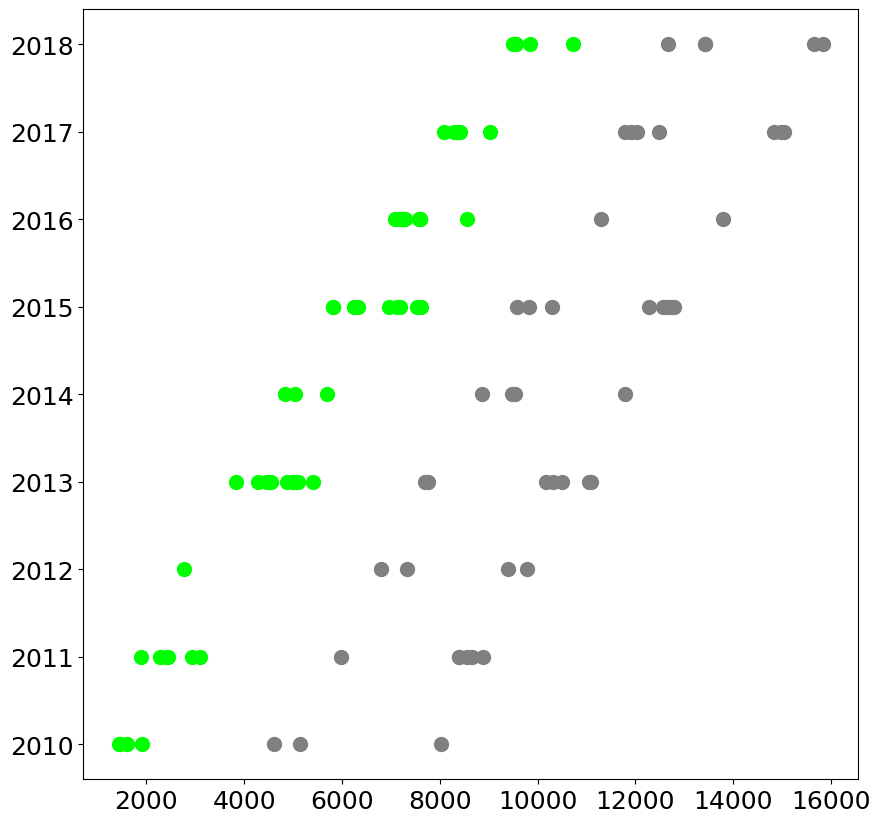

In [83]:
fig = plt.figure(figsize=(10, 10))

colors = {"iOS": "grey", "Android": "lime"}
for d1, d2, l in zip(df.price, df.year, df.os):
    plt.scatter(d1, d2, color=colors[l], s=100)

plt.show()

In [84]:
from sklearn.cluster import KMeans

In [97]:
features = ["year", "price"]
df_train = df[:80]
df_test = df[80:]

X_train = df_train[features]
y_train = df_train["os_type"]

X_test = df_test[features]
y_test = df_test["os_type"]

In [98]:
clust = KMeans(n_clusters=2).fit(X_train)

In [99]:
[c1, c2] = clust.cluster_centers_

In [100]:
c1, c2

(array([2013.21276596, 5652.53191489]),
 array([ 2015.66666667, 11773.09090909]))

In [101]:
train_predict = clust.predict(X_train)

In [102]:
pd.DataFrame({"predicts": train_predict, "os": y_train})

,predicts,os
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
75,0,0
76,0,0
77,0,1
78,0,0


In [103]:
predicts = clust.predict(X_test)

In [104]:
summ = 0
for pred, val in zip(predicts, y_test):
    summ += 0 if val == pred else 1
    

In [105]:
summ

2

In [106]:
print(f"Accuracy: {(20-summ)/(20.0/100):.2f}%")

Accuracy: 90.00%
